<a href="https://colab.research.google.com/github/Josh-robins/SPARK_AI_Medical_Imgaing_Class/blob/main/week4/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

The objective of this project is to design and evaluate a machine learning model capable of accurately predicting whether an individual has diabetes based on a set of physiological and demographic features. Given the Diabetes Dataset, which includes attributes such as glucose concentration, blood pressure, BMI, and age, the challenge is to preprocess the data effectively, select an appropriate classification algorithm, and optimize its performance to achieve reliable predictions. The ultimate goal is to create a model that balances accuracy and generalizability, providing a foundation for potential real-world applications in diabetes screening.

**Key steps to be achived**


1.   Importing required libraries
2.   Loading the dataset
3.   Exploratory Data analysis and Data Cleaning
4.   Feature and Target Separation
5.   Train-Test Split
6.   Feature Scaling
7.   Model Training
8.   Model Evaluation













1. Import Required Libraries

In [ ]:
#importing required libraries
import pandas as pd #data manipulation and analysis
import numpy as np #numerical analysis
import matplotlib.pyplot as plt # creating visualizations
import seaborn as sns #statistical visualisations
from sklearn.model_selection import train_test_split #splits the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

2. Load the dataset

In [ ]:
# import diabtes.csv
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes.csv'

diabtes_df = pd.read_csv(file_path)

print(diabtes_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3. Data Exploration and Cleaning

In [ ]:
#returns the number of rows and number of columns of the data
diabtes_df.shape


(768, 9)

In [ ]:
# Generates a statistical summary of the diabetes DataFrame
diabtes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#returns the number of missing values per column
diabtes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# feature type
diabtes_df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
diabtes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Fill missing values (ones with zero) with the mean for numerical features
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabtes_df[col] = diabtes_df[col].replace(0, diabtes_df[col].mean())
print(diabtes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Class imbalance
diabtes_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


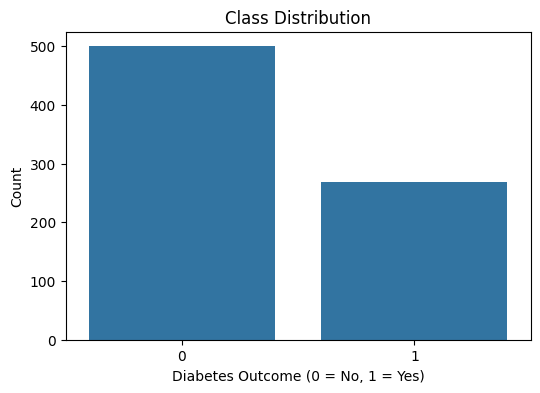

In [ ]:
#count plot for class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabtes_df)
#plt.xticks([0, 1], ['Non Diabetic', 'Diabetic'])
plt.title('Class Distribution')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

There are significantly more patients without diabetes (around 500) than with diabetes (around 260).

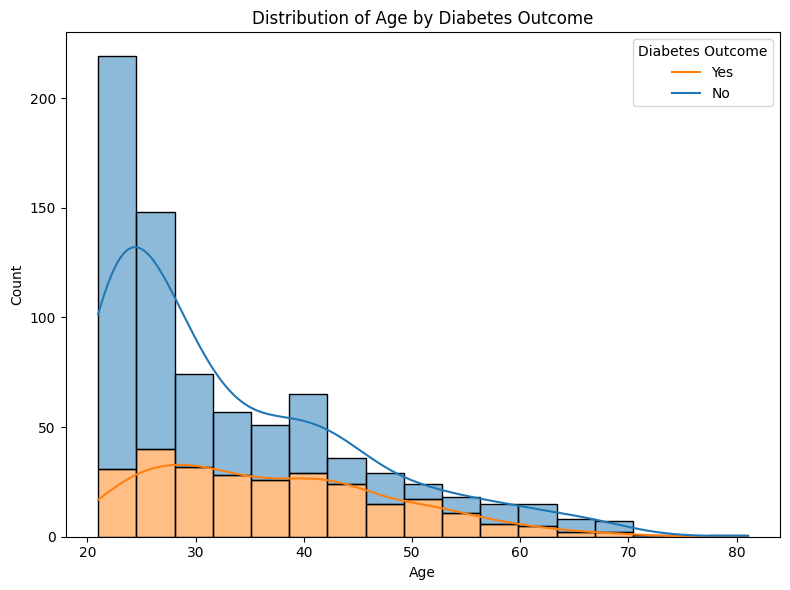

In [ ]:
#plot of distribution of age by diabetes outcome
plt.figure(figsize=(8, 6))
sns.histplot(data = diabtes_df,x= "Age", hue='Outcome', kde=True, multiple="stack")
plt.title(f'Distribution of Age by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.legend(title='Diabetes Outcome',labels =['Yes','No'])
plt.show()

**Diabetes Prevalence Across Age Groups**
*   Diabetes is less common among younger patients (20-30) in this dataset.
*  The proportion of patients with diabetes becomes more significant compared to those without diabetes in older patients (50+)
*   The data is also significantly imbalanced as it conatins mainly young patients who are less prone to diabetes


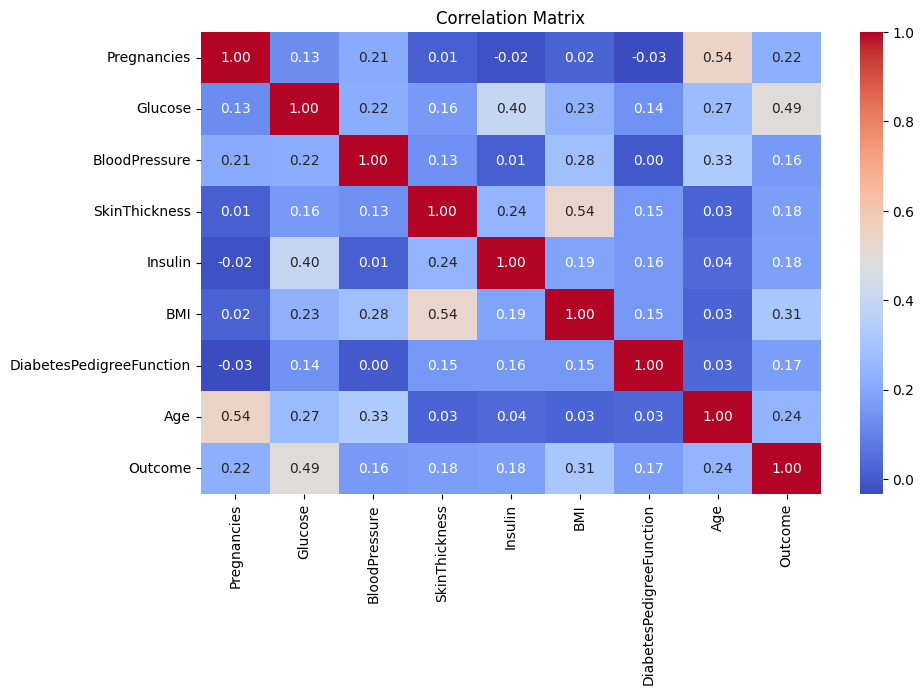

In [ ]:
#correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(diabtes_df.corr(), annot=True, cmap= 'coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*   Higher glucose levels are likely causes of diabetes (0.49)
*   Higher BMI (body mass index) is associated with a higher likelihood of diabetes, which aligns with medical knowledge (obesity is a risk factor for Type 2 diabetes).
*    Insulin (0.18), SkinThickness (0.18), DiabetesPedigreeFunction (0.17), BloodPressure (0.16): These features have weak positive correlations with Outcome. They contribute to predicting diabetes but are less influential than Glucose or BMI.


4. Feature and Target Separation

In [ ]:
#Split into featires and targets
# Drop least important features
X = diabtes_df.drop(columns=['Outcome', 'BloodPressure', 'SkinThickness'])

y=diabtes_df['Outcome']

5. Train-Test Split

In [ ]:
#Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

6. Build the model

In [ ]:
# Train Random Forest with tuned hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=400,       # More trees
    max_depth=10,           # Limits depth for better generalization
    min_samples_split=4,    # Prevents overfitting
    min_samples_leaf=2,     # More stable splits
    max_features='sqrt',    # Uses sqrt(features) for best splits
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=400, random_state=42)

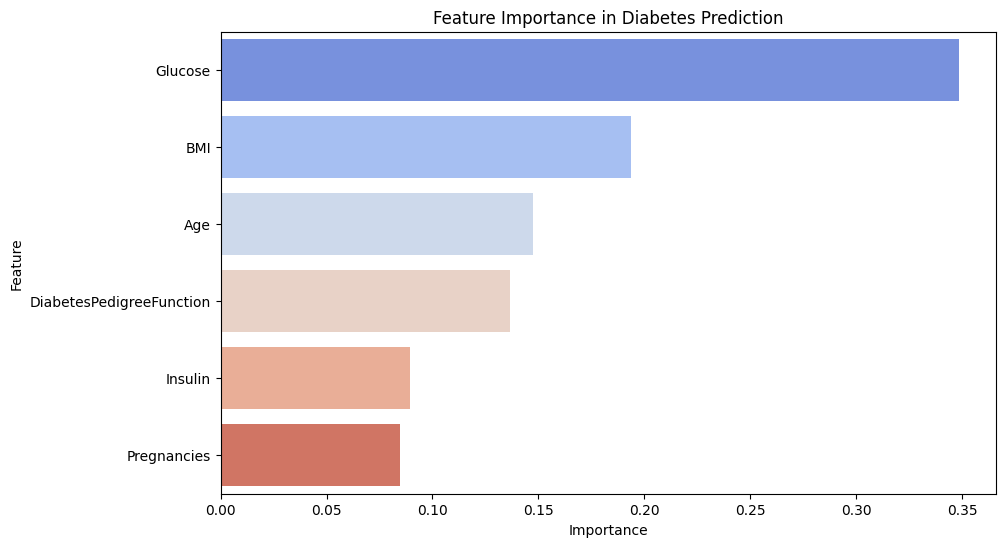

                    Feature  Importance
1                   Glucose    0.348241
3                       BMI    0.193630
5                       Age    0.147455
4  DiabetesPedigreeFunction    0.136382
2                   Insulin    0.089451
0               Pregnancies    0.084842


In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(feature_importance_df)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC

7. Model Evaluation

Accuracy: 0.7662


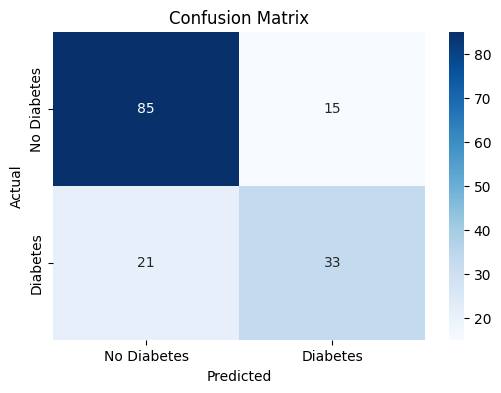

AUC-ROC Score: 0.8209


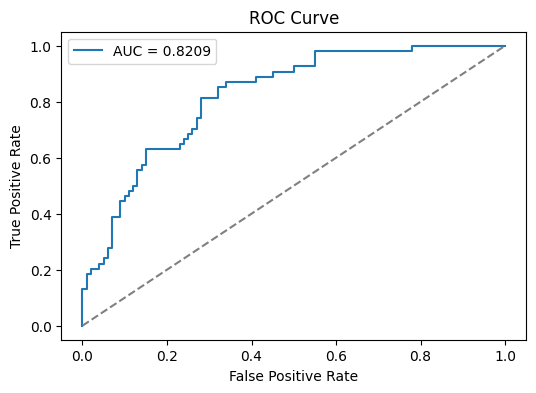

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

**Confusion Matrix (Test Set Results)**
*   True Negatives (TN): 85 (correctly predicted No Diabetes)
*   False Positives (FP): 15 (incorrectly predicted Diabetes)
*  False Negatives (FN): 21 (incorrectly predicted No Diabetes)
*   True Positives (TP): 33 (correctly predicted Diabetes)
*   Total samples in the test set: 154

An AUC of 0.8209 is quite good, indicating that your Random Forest model has a strong ability to differentiate between patients with and without diabetes.


In [ ]:
def categorize_glucose(glucose_level):
  """Categorizes glucose levels into three ranges.
  """
  if glucose_level < 100:
    return 'Low'
  elif 100 <= glucose_level <= 125:
    return 'Normal'
  else:
    return 'High'

# Apply the function to the 'Glucose' column
diabtes_df['GlucoseCategory'] = diabtes_df['Glucose'].apply(categorize_glucose)

# Now you have a new column 'GlucoseCategory' with the categorized values.
# You can analyze it further, e.g., by grouping and counting:
glucose_category_counts = diabtes_df['GlucoseCategory'].value_counts()
glucose_category_counts

,count
GlucoseCategory,
High,297
Normal,274
Low,197


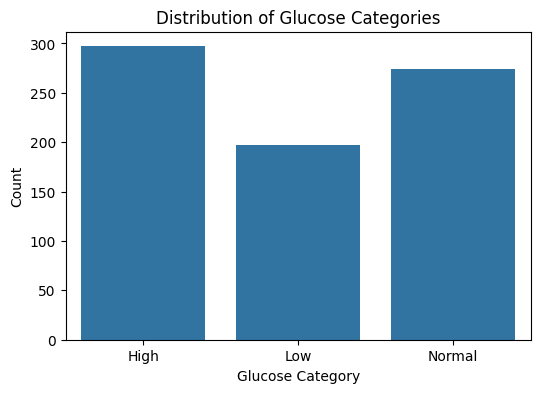

In [ ]:
#plot bar graph to show glucose category counts
plt.figure(figsize=(6, 4))
sns.countplot(x='GlucoseCategory', data=diabtes_df)
plt.title('Distribution of Glucose Categories')
plt.xlabel('Glucose Category')
plt.ylabel('Count')
plt.show()

**Conclusions**

**Model Performance:** The model achieved an accuracy of 76.6%, but its performance on the Diabetes class (F1-score of 64.7%, recall of 61.1%) indicates room for improvement, especially given the class imbalance. The model is better at predicting No Diabetes (specificity of 85%) than Diabetes, which is expected due to the 2:1 class ratio.

**Key Features:** **Glucose, BMI, and Age **are likely the most important predictors, as indicated by the correlation matrix and age distribution analysis. This aligns with medical knowledge—high glucose levels, obesity (high BMI), and older age are known risk factors for Type 2 diabetes.

**Challenges:** The main challenge is the class imbalance, which leads to a lower recall for the Diabetes class. False negatives (21 patients) are a concern in a medical context, as missing diabetic patients could have serious health implications.

**Future Directions:** Addressing the class imbalance (e.g., using SMOTE or class weights), tuning hyperparameters, and focusing on recall will likely improve the model’s ability to identify diabetic patients. Exploring alternative models like XGBoost and conducting cross-validation will provide a more robust evaluation.